In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Columns of the dataset

* `distance_from_home` - the distance from home where the transaction happened.
<br><br>
* `distance_from_last_transaction` - the distance from last transaction happened.
<br><br>
* `ratio_to_median_purchase_price` - Ratio of purchased price transaction to median purchase price.
<br><br>
* `repeat_retailer` - Is the transaction happened from same retailer.
<br><br>
* `used_chip` - Is the transaction through chip (credit card).
<br><br>
* `used_pin_number` - Is the transaction happened by using PIN number.
<br><br>
* `online_order` - Is the transaction an online order.
<br><br>
* `fraud` - Is the transaction fraudulent.

In this dataset, the continuous (ordinal) predictors/features are distance_from_home, distance_from_last_transaction, and ratio_to_median_purchase_price, while the binary variables are repeat_retailer, used_chip, used_pin_number, and online_order. The target variable is fraud.

# Load the data

In [2]:
df = pd.read_csv('card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
len(df)

1000000

The dataset has a million rows.

##### Column name lists for the categorical and continuous variables

In [9]:
categorical_features = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
continuous_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

# EDA

##### Is our dataset imbalanced?

Text(0.5, 1.0, 'Imbalanced dataset! Use AUC curve as metric.')

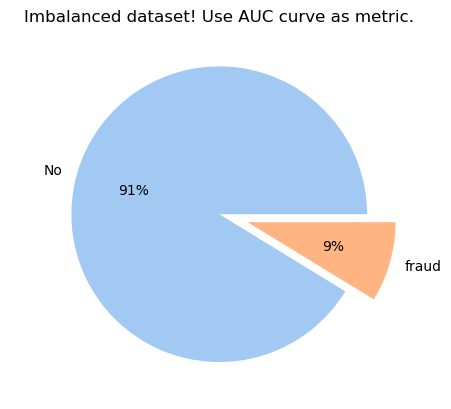

In [12]:
plt.figure()
colors = sns.color_palette('pastel')
df["fraud"].value_counts().plot(kind='pie', 
                                labels=["No", "fraud"], 
                                colors=colors, 
                                autopct = '%0.0f%%', 
                                explode=[0, .2])
plt.ylabel(" ")
plt.title('Imbalanced dataset! Use AUC curve as metric.')

##### Distributions of the continuous variables

(100.0, 134.30760491650076)

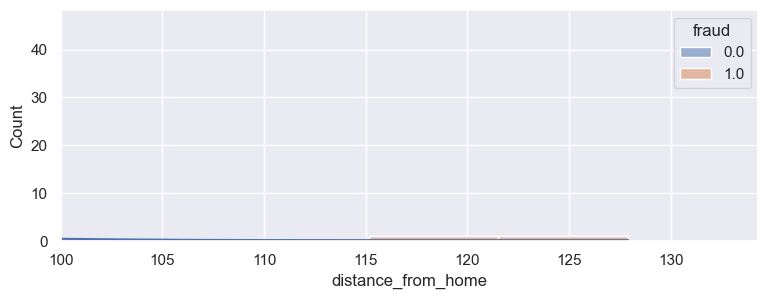

In [19]:
plt.figure()
sns.histplot(data=df[['distance_from_home', 'fraud']].sample(100), x='distance_from_home', hue='fraud', kde=True, multiple="stack")
plt.xlim(100)

<AxesSubplot: xlabel='distance_from_last_transaction', ylabel='Count'>

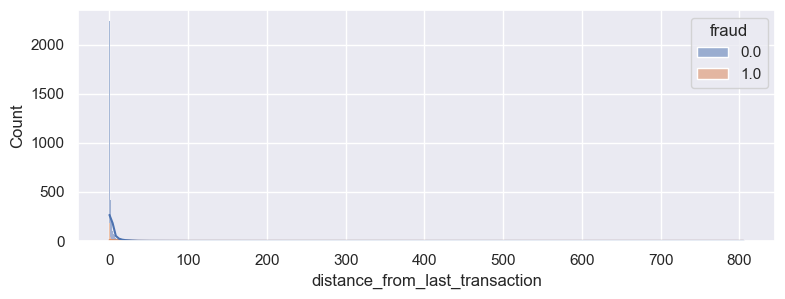

In [24]:
plt.figure()
sns.histplot(data=df[['distance_from_last_transaction', 'fraud']].sample(10000), x='distance_from_last_transaction', hue='fraud', kde=True, multiple="stack")

(5.0, 1032.15)

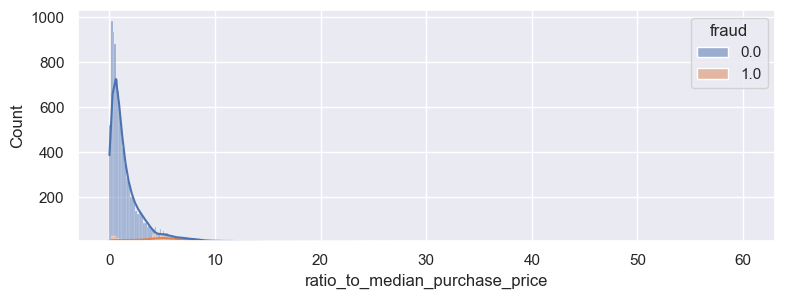

In [29]:
plt.figure()
plot = sns.histplot(data=df[['ratio_to_median_purchase_price', 'fraud']].sample(10000), x='ratio_to_median_purchase_price', hue='fraud', kde=True, multiple="stack")
plot.set_ylim(5)

KeyboardInterrupt: 

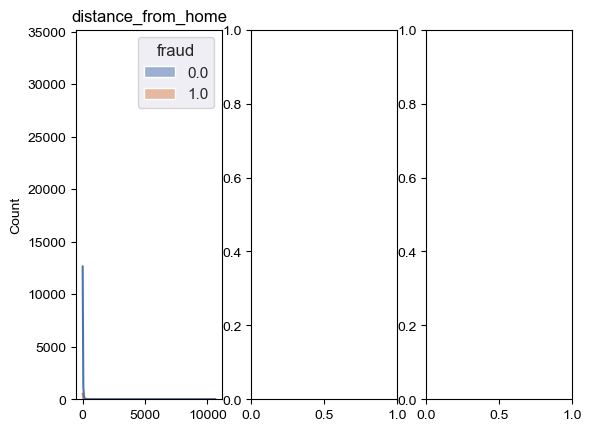

In [13]:
fig, axes = plt.subplots(1, 3)

sns.set(rc={'figure.figsize':(9, 3)})
for col_name, ax in zip(continuous_features, axes.flatten()):
    plot = sns.histplot(data=df[continuous_features+['fraud']], x=col_name, hue='fraud', ax=ax, kde=True, multiple="stack")
    plot.set(title=col_name, xlabel=None)

plt.tight_layout()